In [1]:
from keras import models
from keras import layers

from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                 include_top = False,
                 input_shape = (150,150,3))
 

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "





87910968/87910968 [==============================] - 203s 2us/step


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy
import os 

base_dir = "formal_and_informal_img/"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc'])

history = model.fit(
    train_generator,
steps_per_epoch=50,
epochs=30,
validation_data=validation_generator,
validation_steps=10)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 45s 679ms/step - loss: 0.3793 - acc: 0.8160 - val_loss: 0.5660 - val_acc: 0.7200
Epoch 2/30
50/50 [==============================] - 33s 667ms/step - loss: 0.3759 - acc: 0.8220 - val_loss: 0.5206 - val_acc: 0.7750
Epoch 3/30
50/50 [==============================] - 33s 659ms/step - loss: 0.3518 - acc: 0.8540 - val_loss: 0.5807 - val_acc: 0.7450
Epoch 4/30
50/50 [==============================] - 32s 643ms/step - loss: 0.3705 - acc: 0.8400 - val_loss: 0.5543 - val_acc: 0.7700
Epoch 5/30
50/50 [==============================] - 32s 638ms/step - loss: 0.3498 - acc: 0.8410 - val_loss: 0.5684 - val_acc: 0.7600
Epoch 6/30
50/50 [==============================] - 33s 652ms/step - loss: 0.3314 - acc: 0.8500 - val_loss: 0.5512 - val_acc: 0.7650
Epoch 7/30
50/50 [==============================] - 34s 670ms/step - loss: 0.3256 - acc: 0.8530 - val_loss: 0.6055 - va

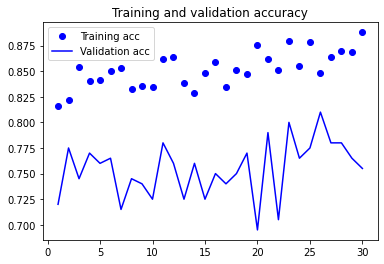

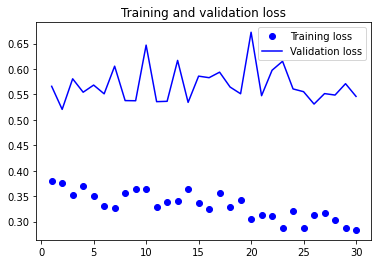

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
model.save('inceptionv3_model_with_accuracy_88and_75_validation_accuracy.h5')

C:\python3.9.7\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
import numpy as np

img_path =  'D:Camera/6th_semester/IMG20221127113823.jpg'
your_target_size=(150,150,3)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(your_target_size))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)


# features = conv_base.predict(img_array)

# Flatten the features 2))

model = load_model('pretrain_model_cnn.h5')
# Make predictions using the trained model
predictions = model.predict(img_array)

# Interpret the results (assuming binary classification)
class_label = "Formal" if predictions[0][0] < 0.5 else "Informal"
confidence = predictions[0][0]

print(f"Predicted class: {class_label}")
print(f"Confidence: {confidence}")

1/1 [==============================] - 1s 596ms/step
Predicted class: Formal
Confidence: 0.0008038017549552023


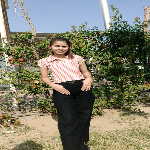

In [11]:
img